In [565]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

#Importing and reading CSV file
file_messy = 'C:\\Users\\Sneha Rani\\CapstoneProject1\\Total_Wealth.csv'
df1 = pd.read_csv(file_messy, encoding='latin-1',index_col=None)
#Replacing ".." with NaN 
df1 = df1.apply(lambda x: x.str.strip()).replace('..', np.nan)
#Removing comma(,) from the value data which is in string format
for col in  df1.columns[4:]:
    df1[col] = df1[col].str.replace(",","")
#Converting object type to numeric    
for col in  df1.columns[4:]:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
df1.head(10)

Populating the interactive namespace from numpy and matplotlib


,Country,CountryCode,Region,IncomeGroup,Yr_1995_Population,Yr_1995_Total Wealth,Yr_2000_Population,Yr_2000_Total Wealth,Yr_2005_Population,Yr_2005_Total Wealth
0,Afghanistan,AFG,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe & Central Asia,Lower middle income,NaN,NaN,3061775.0,1.055159e+11,3129678.0,1.661720e+11
2,Algeria,DZA,Middle East & North Africa,Upper middle income,28270780.0,1.018564e+12,30463134.0,1.049253e+12,32853798.0,9.937950e+11
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,ADO,Europe & Central Asia,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,15941392.0,2.200501e+11
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,34834902.0,2.609716e+12,36895712.0,2.707134e+12,38747148.0,2.760798e+12
8,Armenia,ARM,Europe & Central Asia,Lower middle income,NaN,NaN,3082000.0,5.756369e+10,3016312.0,8.804714e+10
9,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
#Checking the spelling of the Country column
countries = df1['Country']
pattern = '^[A-Za-z\.\s]*$'
# Create the Boolean vector: mask: valid countries
mask = countries.str.contains(pattern)
valid_countries = countries.loc[mask]
mask_inverse = ~mask
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]
# Print invalid_countries
print(invalid_countries)

43          Congo, Dem. Rep.
44               Congo, Rep.
46             Côte d'Ivoire
56          Egypt, Arab Rep.
68               Gambia, The
78             Guinea-Bissau
82          Hong Kong, China
87        Iran, Islamic Rep.
99          Korea, Dem. Rep.
100              Korea, Rep.
112             Macao, China
113           Macedonia, FYR
125    Micronesia, Fed. Sts.
161    São Tomé and Principe
187              Timor-Leste
202            Venezuela, RB
204    Virgin Islands (U.S.)
206              Yemen, Rep.
Name: Country, dtype: object


In [567]:
#Dropping the index containing inavlid country name 
df1 = df1.drop(df1.index[[43,44,46,56,68,78,82,87,99,100,112,113,125,161,187,202,204,206]])
#Reset index
df1 = df1.reset_index(drop=True)
df1.head(50)

,Country,CountryCode,Region,IncomeGroup,Yr_1995_Population,Yr_1995_Total Wealth,Yr_2000_Population,Yr_2000_Total Wealth,Yr_2005_Population,Yr_2005_Total Wealth
0,Afghanistan,AFG,South Asia,Low income,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe & Central Asia,Lower middle income,NaN,NaN,3.061775e+06,1.055159e+11,3.129678e+06,1.661720e+11
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2.827078e+07,1.018564e+12,3.046313e+07,1.049253e+12,3.285380e+07,9.937950e+11
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,ADO,Europe & Central Asia,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,1.594139e+07,2.200501e+11
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,3.483490e+07,2.609716e+12,3.689571e+07,2.707134e+12,3.874715e+07,2.760798e+12
8,Armenia,ARM,Europe & Central Asia,Lower middle income,NaN,NaN,3.082000e+06,5.756369e+10,3.016312e+06,8.804714e+10
9,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN


In [568]:
#Filling the missing population data by grouping the region and taking out their mean
df1['Yr_1995_Population'].fillna(df1.groupby('Region')['Yr_1995_Population'].transform('mean'), inplace=True)
df1['Yr_2000_Population'].fillna(df1.groupby('Region')['Yr_2000_Population'].transform('mean'), inplace=True)
df1['Yr_2005_Population'].fillna(df1.groupby('Region')['Yr_2005_Population'].transform('mean'), inplace=True)

#Filling the missing total wealth data by grouping the IncomeGroup and taking out their mean
df1['Yr_1995_Total Wealth'].fillna(df1.groupby('IncomeGroup')['Yr_1995_Total Wealth'].transform('mean'), inplace=True)
df1['Yr_2000_Total Wealth'].fillna(df1.groupby('IncomeGroup')['Yr_2000_Total Wealth'].transform('mean'), inplace=True)
df1['Yr_2005_Total Wealth'].fillna(df1.groupby('IncomeGroup')['Yr_2005_Total Wealth'].transform('mean'), inplace=True)

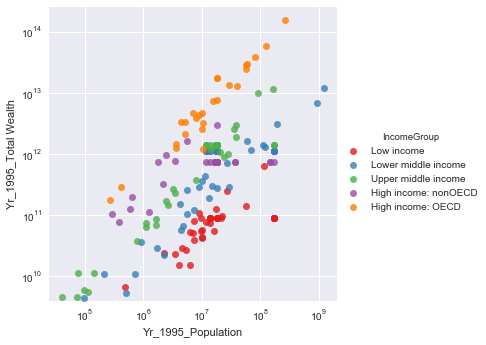

In [569]:
sns.set()
sns.lmplot(x='Yr_1995_Population', y='Yr_1995_Total Wealth', data=df1, fit_reg=False, hue='IncomeGroup', palette = 'Set1')
plt.xscale('log')
plt.yscale('log')

**Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible and data more interprettable.**

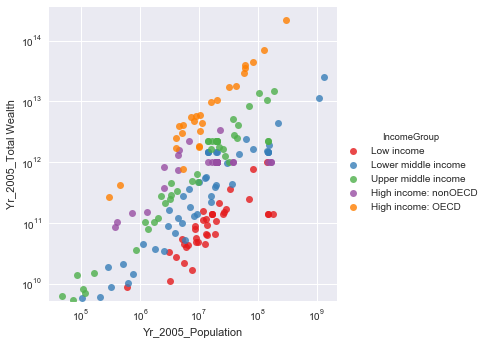

In [570]:
sns.set()
sns.lmplot(x='Yr_2005_Population', y='Yr_2005_Total Wealth', data=df1, fit_reg=False, hue='IncomeGroup', palette = 'Set1') 
plt.xscale('log')
plt.yscale('log')

**1. How the overall wealth of region changed over the years (1995, 2005)?**

For this we plotted scatter plot graph which shows how the wealth of nation is distributed according to the population size for each years (1995, 2005)

We used lmplot which is a package of seaborn to plot the graph.

With the help of this feature we plotted the graph by grouping the Income Group of the nation to get the pattern of change in wealth of the nation according to the population size.

For the year 1995, we explored from the graph that the high income: OECD group nation is showing linear growth i.e wealth of the nation is drastically increasing as the population size of the nation is increasing.

For other nation which is grouped under different income groups there is a similar growth in the pattern were wealth of the nation is progressively increasing as the population of the nation increases.

But for the low income group, we can observe from the graph that growth in the wealth of nation and population is consistent under certain range.

We are observing the same pattern for other years, though data value is different. Since we have larger value data, we have scaled using log. So, we are hardly to find the minor changes with the other plotted graphs with respect to other years.

In [571]:
#Importing and reading CSV file
file_messy = 'C:\\Users\\Sneha Rani\\CapstoneProject1\\Labor_Force.csv'
df2 = pd.read_csv(file_messy, encoding='latin-1',index_col=None)
#replacing-blank-values-white-space-with-nan-in-pandas
df2 = df2.replace(r'^\s+$', np.nan, regex=True)
#Converting object type to numeric    
for col in  df2.columns[4:]:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
#Adding new columns to dataframe 'df2' and converting values from percentage to millions
df2['Total_Particip_Net_1995'] = (((df2['Total_Particip_Rate_Pcnt_1995']/100)*df2['Total_Pop_Million_1995']) * 1000000)
df2['Total_Particip_Net_2005'] = (((df2['Total_Particip_Rate_Pcnt_2005']/100)*df2['Total_Pop_Million_2005']) * 1000000)
df2.head(5)

,Country,Total_Pop_Million_1995,Total_Pop_Million_2005,Total_Pop_Million_2010,Total_WorkAge_Pop_Pcnt_1995,Total_WorkAge_Pop_Pcnt_2005,Total_WorkAge_Pop_Pcnt_2010,Total_Particip_Rate_Pcnt_1995,Total_Particip_Rate_Pcnt_2005,Total_Particip_Rate_Pcnt_2010,Total_Unemp_Rate_Pcnt_1995,Total_Unemp_Rate_Pcnt_2005,Total_Unemp_Rate_Pcnt_2010,Total_Particip_Net_1995,Total_Particip_Net_2005
0,Afghanistan,22.5,29.9,34.4,NaN,48.7,NaN,NaN,65.2,NaN,NaN,8.5,NaN,NaN,19494800.0
1,Albania,3.1,3.1,3.2,61.7,69.1,NaN,68.1,57.8,NaN,NaN,13.5,13.8,2111100.0,1791800.0
2,Algeria,28.3,32.9,35.5,NaN,NaN,NaN,NaN,NaN,NaN,27.9,15.3,11.4,NaN,NaN
3,Angola,12.1,16.5,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,34.8,38.6,40.5,61.0,64.7,65.6,63.5,69.0,67.8,18.8,10.6,8.6,22098000.0,26634000.0


In [572]:
#Importing and reading CSV file
file_messy = 'C:\\Users\\Sneha Rani\\CapstoneProject1\\Labor_Force_Women.csv'
df3 = pd.read_csv(file_messy, encoding='latin-1',index_col=None)
#Converting object type to numeric    
for col in  df3.columns[4:]:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')

#Adding new columns to dataframe 'df3' and converting values from percentage to millions
df3['Women_Particip_Net_1995'] = (((df3['Women_Particip_Rate_Pcnt_1995']/100)*df3['Women_Population_Millions_1995'])*1000000)
df3['Women_Particip_Net_2005'] = (((df3['Women_Particip_Rate_Pcnt_2005']/100)*df3['Women_Population_Millions_2005'])*1000000)

#Adding new columns to dataframe 'df3' and converting values from percentage to millions
df3['Women_WorkAge_Net_1995'] = (((df3['Women_WorkAge_Pcnt_1995']/100)*df3['Women_Population_Millions_1995'])*1000000)
df3['Women_WorkAge_Net_2005'] = (((df3['Women_WorkAge_Pcnt_2005']/100)*df3['Women_Population_Millions_2005'])*1000000)
df3.head(5) 

,Country,Women_Population_Millions_1995,Women_Population_Millions_2005,Women_Population_Millions_2010,Women_WorkAge_Pcnt_1995,Women_WorkAge_Pcnt_2005,Women_WorkAge_Pcnt_2010,Women_Particip_Rate_Pcnt_1995,Women_Particip_Rate_Pcnt_2005,Women_Particip_Rate_Pcnt_2010,Women_Unemp_Rate_Pcnt_1995,Women_Unemp_Rate_Pcnt_2005,Women_Unemp_Rate_Pcnt_2010,Women_Particip_Net_1995,Women_Particip_Net_2005,Women_WorkAge_Net_1995,Women_WorkAge_Net_2005
0,Afghanistan,10.8,14.4,16.6,NaN,49.6,NaN,NaN,45.1,NaN,NaN,9.5,NaN,NaN,6494400.0,NaN,7142400.0
1,Albania,1.6,1.6,1.6,62.4,68.7,NaN,62.3,49.2,NaN,NaN,12.2,15.9,996800.0,787200.0,998400.0,1099200.0
2,Algeria,14.0,16.3,17.6,NaN,NaN,NaN,NaN,NaN,NaN,38.4,17.5,20.0,NaN,NaN,NaN,NaN
3,Angola,6.1,8.3,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,17.7,19.7,20.7,61.0,62.8,63.8,47.7,57.2,55.5,22.3,12.4,9.8,8442900.0,11268400.0,10797000.0,12371600.0


In [585]:
# Selecting required columns from df1 dataframe
df1_new = df1[['Country', 'Region', 'IncomeGroup', 'Yr_1995_Total Wealth', 'Yr_2005_Total Wealth']]

# Selecting required columns from df2 dataframe
df2_new = df2[['Country', 'Total_Particip_Net_1995', 'Total_Particip_Net_2005']]

# Selecting required columns from df3 dataframe
df3_new = df3[['Country', 'Women_Particip_Net_1995', 'Women_Particip_Net_2005']]

# Merging multiple dataframes into new dataframe
wealth_lf = pd.merge(df1_new, df2_new).merge(df3_new)
#Filling the missing total participation rate percentage data by grouping the Region and taking out their median
wealth_lf['Total_Particip_Net_1995'].fillna(wealth_lf.groupby('Region')['Total_Particip_Net_1995'].transform('median'), inplace=True)
wealth_lf['Total_Particip_Net_2005'].fillna(wealth_lf.groupby('Region')['Total_Particip_Net_2005'].transform('median'), inplace=True)
#Filling the missing women participation rate percentage data by grouping the Region and taking out their median
wealth_lf['Women_Particip_Net_1995'].fillna(wealth_lf.groupby('Region')['Women_Particip_Net_1995'].transform('median'), inplace=True)
wealth_lf['Women_Particip_Net_2005'].fillna(wealth_lf.groupby('Region')['Women_Particip_Net_2005'].transform('median'), inplace=True)
wealth_lf

,Country,Region,IncomeGroup,Yr_1995_Total Wealth,Yr_2005_Total Wealth,Total_Particip_Net_1995,Total_Particip_Net_2005,Women_Particip_Net_1995,Women_Particip_Net_2005
0,Afghanistan,South Asia,Low income,8.900591e+10,1.413615e+11,13456800.0,19494800.0,6512400.0,6494400.0
1,Albania,Europe & Central Asia,Lower middle income,1.110790e+12,1.661720e+11,2111100.0,1791800.0,996800.0,787200.0
2,Algeria,Middle East & North Africa,Upper middle income,1.018564e+12,9.937950e+11,6858750.0,6009250.0,1062000.0,1164000.0
3,Angola,Sub-Saharan Africa,Lower middle income,1.110790e+12,2.200501e+11,9467100.0,9651000.0,4408500.0,4847500.0
4,Argentina,Latin America & Caribbean,Upper middle income,2.609716e+12,2.760798e+12,22098000.0,26634000.0,8442900.0,11268400.0
5,Armenia,Europe & Central Asia,Lower middle income,1.110790e+12,8.804714e+10,6272100.0,1683300.0,2702300.0,720000.0
6,Australia,South Asia & Pacific,High income: OECD,7.525065e+12,1.054679e+13,13412100.0,15381600.0,5842200.0,7024600.0
7,Austria,Europe & Central Asia,High income: OECD,3.943715e+12,4.698368e+12,5720000.0,5936800.0,2554300.0,2755200.0
8,Azerbaijan,Europe & Central Asia,Lower middle income,1.110790e+12,1.283233e+11,3696000.0,5961700.0,1532700.0,2789300.0
9,Bangladesh,South Asia,Low income,6.424697e+11,1.008173e+12,13456800.0,20844850.0,6512400.0,8425800.0


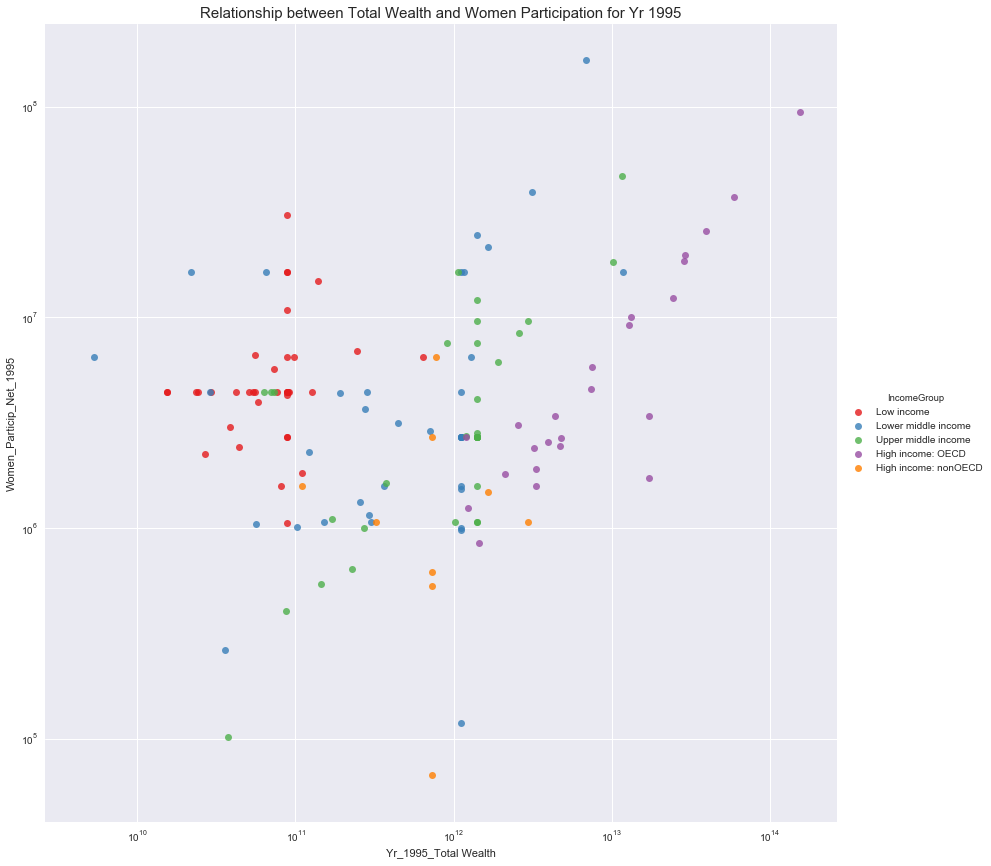

In [599]:
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=wealth_lf, size = 12, fit_reg=False, hue='IncomeGroup', palette = 'Set1') 
#Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible 
#and data more interprettable.
plt.xscale('log')
plt.yscale('log')
plt.title("Relationship between Total Wealth and Women Participation for Yr 1995", fontsize=15)

**IS there any relationship between women labor force participation and the total wealth of the year(1995, 2005) with respect to the income group? How women labor force participation rate changes over years with the total wealth of particular income group?**

As we all know that scatter plot shows the relationship between two variables and how much one variable is affected by another.

**For this, I plotted scatter plot inorder to know the correlation between women labor force participation and the total wealth by grouping the IncomeGroup of the nation for the year 1995.**

From the above graph visualization, it clearly shows that women participation is positively correlated with the total wealth of the nation for High income:OECD group nation. It means there exists some relation between the two variables, i.e if there is any change in X ie. (total wealth of nation) variable, Y ie. (women participation) variable will also change, but it does not and cannot prove that one variable is causing the other.

To identify the relationship in a more deeper way, I seperately plotted scatter plot graph and also found Pearson Coefficient for each plot with different IncomeGroup of the nation fo the year 1995.

*From the below graph observation we can say that:*

Pearson Coefficient for 'Low income' = 0.10 which means weak realtionship, ie. there is no correlation between the two variables.

Pearson Coefficient for 'Lower middle income' = 0.53 which shows moderate positive correlation between two variables. 

Pearson Coefficient for 'Upper middle income' = 0.84 which shows very strong positive correlation between two variables.

Pearson Coefficient for 'High income: OECD' = 0.99 which shows highly strong positive correlation between two variables.

Pearson Coefficient for 'High income: nonOECD' = -0.08 which shows very weak negative relationship, ie. there is no correlation between the two variables.

(0.10553604622960888, 0.53416724829085238)

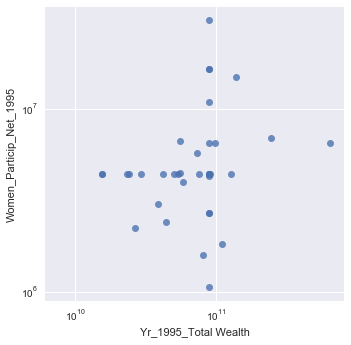

In [601]:
wealth_lf1 = wealth_lf[wealth_lf['IncomeGroup']=='Low income']
d = wealth_lf1.loc[:,['IncomeGroup', 'Yr_1995_Total Wealth', 'Women_Particip_Net_1995']]
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=d, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d['Yr_1995_Total Wealth'], d['Women_Particip_Net_1995'])

(0.5307752251489426, 0.00050869928374025117)

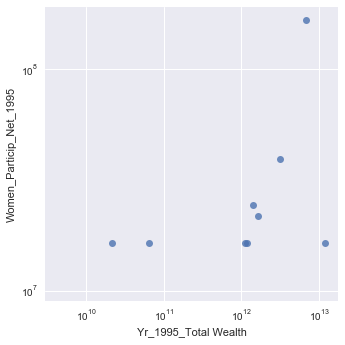

In [578]:
wealth_lf1 = wealth_lf[wealth_lf['IncomeGroup']=='Lower middle income']
d = wealth_lf1.loc[:,['IncomeGroup', 'Yr_1995_Total Wealth', 'Women_Particip_Net_1995']]
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=d, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d['Yr_1995_Total Wealth'], d['Women_Particip_Net_1995'])

(0.84932674351445447, 2.1522154819149867e-10)

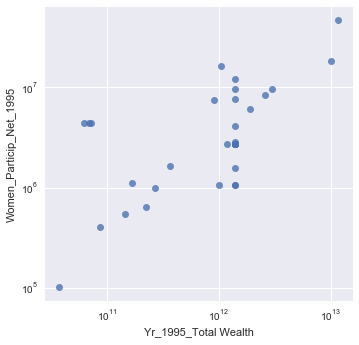

In [579]:
wealth_lf1 = wealth_lf[wealth_lf['IncomeGroup']=='Upper middle income']
d = wealth_lf1.loc[:,['IncomeGroup', 'Yr_1995_Total Wealth', 'Women_Particip_Net_1995']]
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=d, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d['Yr_1995_Total Wealth'], d['Women_Particip_Net_1995'])

(0.99135556991316398, 6.6678579771558734e-21)

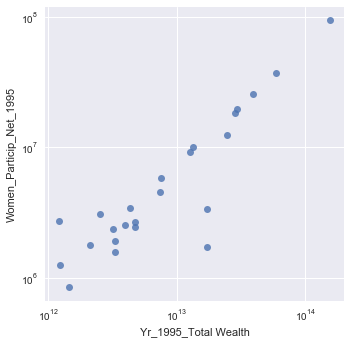

In [580]:
wealth_lf1 = wealth_lf[wealth_lf['IncomeGroup']=='High income: OECD']
d = wealth_lf1.loc[:,['IncomeGroup', 'Yr_1995_Total Wealth', 'Women_Particip_Net_1995']]
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=d, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d['Yr_1995_Total Wealth'], d['Women_Particip_Net_1995'])

(-0.088007951025124848, 0.82186486114570312)

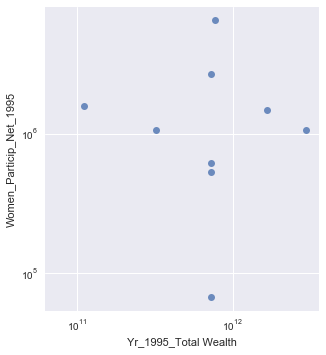

In [581]:
wealth_lf1 = wealth_lf[wealth_lf['IncomeGroup']=='High income: nonOECD']
d = wealth_lf1.loc[:,['IncomeGroup', 'Yr_1995_Total Wealth', 'Women_Particip_Net_1995']]
sns.set()
sns.lmplot(x='Yr_1995_Total Wealth', y='Women_Particip_Net_1995', data=d, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d['Yr_1995_Total Wealth'], d['Women_Particip_Net_1995'])

Now, I am going to again plot scatter plot inorder to know the correlation between women labor force participation and the total wealth by grouping the IncomeGroup of the nation but for the year 2005 this time.

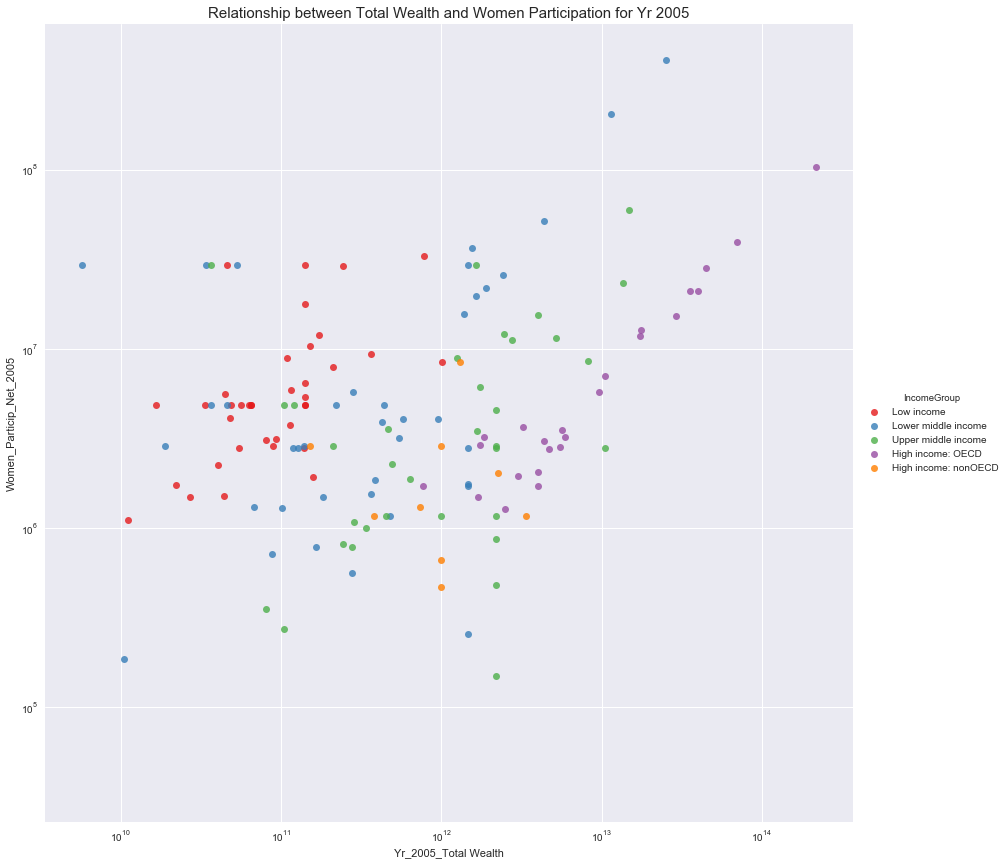

In [598]:
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=wealth_lf, size = 12, fit_reg=False, hue='IncomeGroup', palette = 'Set1') 
plt.xscale('log')
plt.yscale('log')
plt.title("Relationship between Total Wealth and Women Participation for Yr 2005", fontsize=15)

From the above graph visualization, it clearly shows that women participation is positively correlated with the total wealth of the nation for High income:OECD and Upper middle income group nation. It means there exists some relation between the two variables.

So, again we are trying to identify the relationship in a more deeper way. 

**For this, I seperately plotted scatter plot graph and also found Pearson Coefficient for each plot with different IncomeGroup of the nation fo the year 2005.**

*From the below graph observation we can say that:*

Pearson Coefficient for 'Low income' = 0.40 which means weak realtionship, ie. there is no correlation between the two variables.

Pearson Coefficient for 'Lower middle income' = 0.98 which shows very strong positive correlation between two variables. 

Pearson Coefficient for 'Upper middle income' = 0.61 which shows moderate relationship between two variables.

Pearson Coefficient for 'High income: OECD' = 0.99 which shows highly strong positive correlation between two variables.

Pearson Coefficient for 'High income: nonOECD' = -0.03 which shows very weak negative relationship, ie. there is no correlation between the two variables.

(0.40377911353271512, 0.013199758258318822)

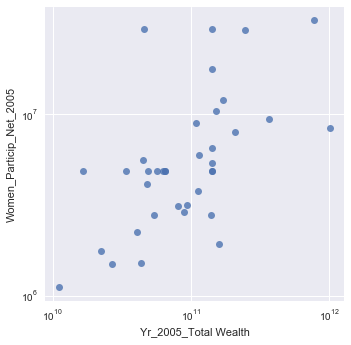

In [589]:
wealth_lf2 = wealth_lf[wealth_lf['IncomeGroup']=='Low income']
d1 = wealth_lf2.loc[:,['IncomeGroup', 'Yr_2005_Total Wealth', 'Women_Particip_Net_2005']]
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=d1, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d1['Yr_2005_Total Wealth'], d1['Women_Particip_Net_2005'])

(0.98466586324177097, 1.1565966247900282e-29)

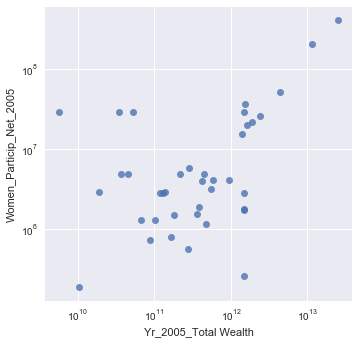

In [591]:
wealth_lf2 = wealth_lf[wealth_lf['IncomeGroup']=='Lower middle income']
d1 = wealth_lf2.loc[:,['IncomeGroup', 'Yr_2005_Total Wealth', 'Women_Particip_Net_2005']]
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=d1, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d1['Yr_2005_Total Wealth'], d1['Women_Particip_Net_2005'])

(0.61924608380353363, 9.4359695137885848e-05)

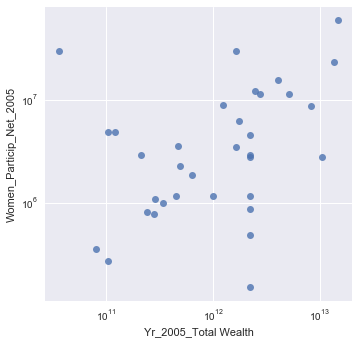

In [592]:
wealth_lf2 = wealth_lf[wealth_lf['IncomeGroup']=='Upper middle income']
d1 = wealth_lf2.loc[:,['IncomeGroup', 'Yr_2005_Total Wealth', 'Women_Particip_Net_2005']]
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=d1, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d1['Yr_2005_Total Wealth'], d1['Women_Particip_Net_2005'])

(0.9962634665344029, 6.7118035827027419e-25)

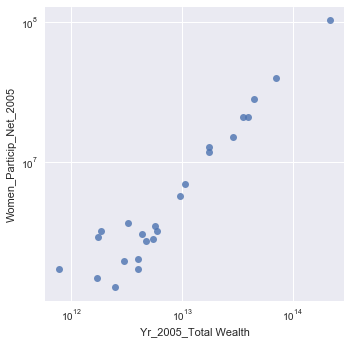

In [593]:
wealth_lf2 = wealth_lf[wealth_lf['IncomeGroup']=='High income: OECD']
d1 = wealth_lf2.loc[:,[IncomeGroup', 'Yr_2005_Total Wealth', 'Women_Particip_Net_2005']]
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=d1, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d1['Yr_2005_Total Wealth'], d1['Women_Particip_Net_2005'])

(-0.037647382339125228, 0.92339590907315228)

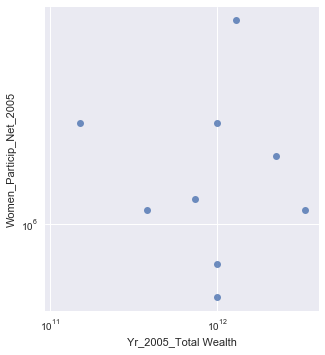

In [594]:
wealth_lf2 = wealth_lf[wealth_lf['IncomeGroup']=='High income: nonOECD']
d1 = wealth_lf2.loc[:,['IncomeGroup', 'Yr_2005_Total Wealth', 'Women_Particip_Net_2005']]
sns.set()
sns.lmplot(x='Yr_2005_Total Wealth', y='Women_Particip_Net_2005', data=d1, fit_reg=False, palette = 'Set1')
plt.xscale('log')
plt.yscale('log')
stats.pearsonr(d1['Yr_2005_Total Wealth'], d1['Women_Particip_Net_2005'])

**From above all observations, we can say that**

*High income: OECD group of the nation for both the years (1995 and 2005) has constant high positive correlation between women participation rate and total wealth. ie. For both the years, as the total wealth increases, women participation also increased for High income: OECD group.*

*Secondly, Pearson Coefficient for 'Lower middle income' is 0.53 for year 1995, showing moderate positive correlation between the two variables but Pearson Coefficient for 'Lower middle income' increases to 0.98 for the year 2005 showing high correlation between the two variables.This may also illustrate that there is some or more linear growth in the year 2005 as compared to the year 1995 and may also add up saying that women participation rate might have increased for the year 2005.*

*Thirdly, Pearson Coefficient for 'Upper middle income' = 0.84 for the year 1995 showing very strong positive correlation between two variables suddenly falls down to 0.61 for the year 2005 showing some or less growth for the year 2005 which ends up saything that total wealth is not much correlated with women labor force participation for the year 2005 ie. 
increase in the wealth of the nation might not be the probable cause for the increase in women labor force participation.*